In [38]:
library(devtools)
install_github("trinker/pacman")

Skipping install of 'pacman' from a github remote, the SHA1 (ace09364) has not changed since last install.
  Use `force = TRUE` to force installation



In [39]:
pacman::p_load(dplyr, ggplot2)
print("Loaded dplyr and ggplot2")

[1] "Loaded dplyr and ggplot2"


In [40]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] h2o_3.40.0.4    gbm_2.1.8.1     xgboost_1.7.5.1 recipes_1.0.6  
 [5] ggplot2_3.4.2   dplyr_1.1.2     devtools_2.4.1  usethis_2.2.1  
 [9] bigrquery_1.4.2 httr_1.4.6     

loaded via a namespace (and not attached):
 [1] pkgload_1.3.2        tidyr_1.3

In [41]:
# Insert data
data = read.csv(file = "/kaggle/input/bank-marketing/bank-additional-full.csv",
                     sep = ";", stringsAsFactors = T)

In [42]:
head(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [43]:
str(data)

'data.frame':	41188 obs. of  21 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 8 6 4 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 2 1 1 1 2 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : i

In [44]:
summary(data)

      age                 job            marital     
 Min.   :17.00   admin.     :10422   divorced: 4612  
 1st Qu.:32.00   blue-collar: 9254   married :24928  
 Median :38.00   technician : 6743   single  :11568  
 Mean   :40.02   services   : 3969   unknown :   80  
 3rd Qu.:47.00   management : 2924                   
 Max.   :98.00   retired    : 1720                   
                 (Other)    : 6156                   
               education        default         housing           loan      
 university.degree  :12168   no     :32588   no     :18622   no     :33950  
 high.school        : 9515   unknown: 8597   unknown:  990   unknown:  990  
 basic.9y           : 6045   yes    :    3   yes    :21576   yes    : 6248  
 professional.course: 5243                                                  
 basic.4y           : 4176                                                  
 basic.6y           : 2292                                                  
 (Other)            : 1749   

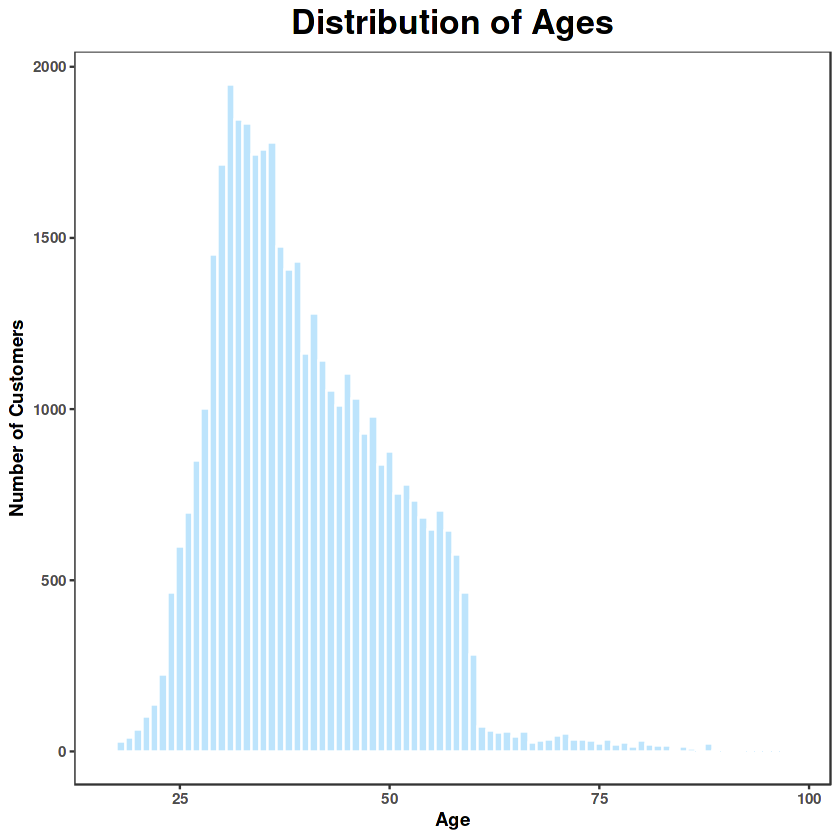

In [45]:
plot_age = ggplot(data, aes(x = age, fill = age, alpha = 0.8)) +
                     geom_histogram(binwidth = 1,color="white", fill="lightskyblue") +
                     labs(x = "Age",y = 'Number of Customers', 
                          title = 'Distribution of Ages') +
                     theme_bw()+
                     theme(text = element_text(face = "bold"),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     # Change font size and center title
                     plot.title = element_text(size = 20, hjust = 0.5),   
                     axis.ticks = element_line(), legend.position="none")
plot_age

Here we can see that the majority of the bank's customers are between 25-50. More specifically, 50% of them are between 32 and 47. The median age is 37, therefore the best target consumer for the bank would be middle aged adult.

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


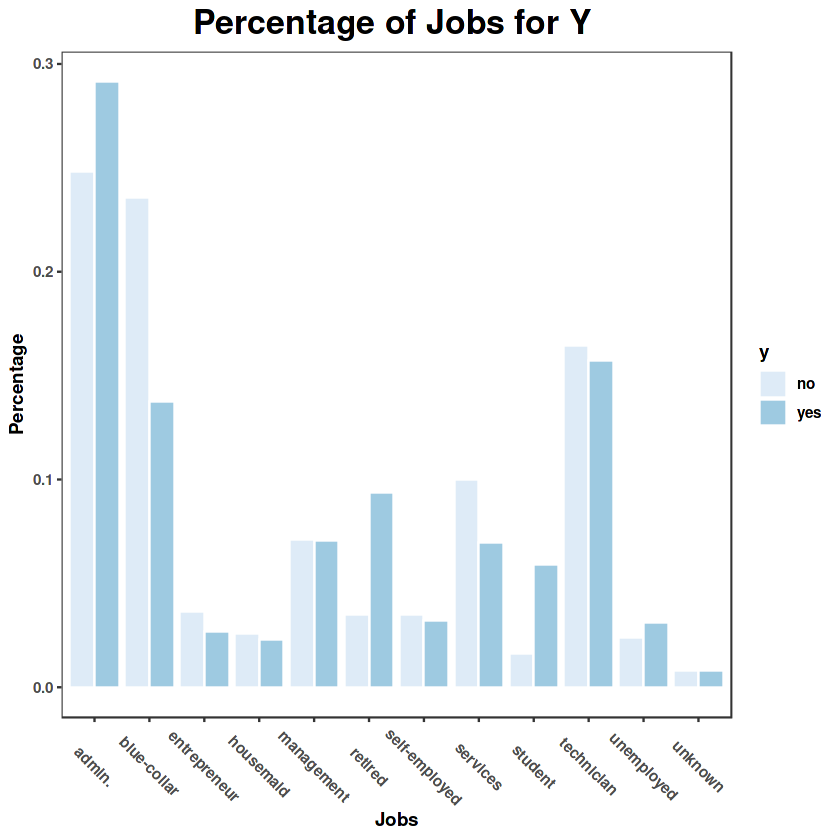

In [46]:
plot_job = 
  data %>%
  group_by(y, job) %>%
  summarise(cnt = n()) %>%
  mutate(pect = cnt / sum(cnt)) %>%
  ggplot(aes(x = job, y = pect, fill = y)) +
                     geom_bar(color="white", position = "dodge",stat = "identity") +
                     labs(x = "Jobs", y = 'Percentage', 
                          title = 'Percentage of Jobs for Y ') +
                     scale_fill_brewer(palette = "Blues") +
                     theme_bw() + 
                     theme(text = element_text(face = "bold"),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     plot.title = element_text(size = 20, hjust = 0.5),   
                     axis.ticks = element_line(), 
                     axis.text.x = element_text(angle = -45, vjust = 0.5),
                     legend.position="right")
plot_job

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


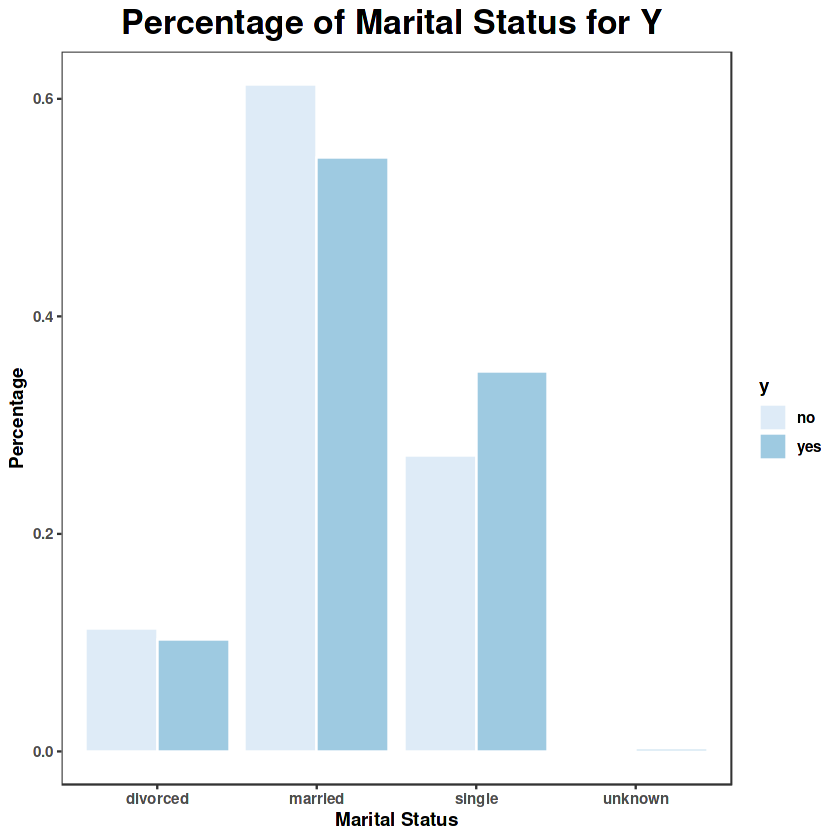

In [47]:
plot_marital = 
  data %>%
  group_by(y, marital) %>%
  summarise(cnt = n()) %>%
  mutate(pect = cnt / sum(cnt)) %>%
  ggplot(aes(x = marital, y = pect, fill = y)) +
                     geom_bar(color="white", position = "dodge",stat = "identity") +
                     labs(x = "Marital Status",y = 'Percentage', 
                          title = 'Percentage of Marital Status for Y ') +
                     scale_fill_brewer(palette = "Blues") +
                     theme_bw()+
                     theme(text = element_text(face = "bold"),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     plot.title = element_text(size = 20, hjust = 0.5),   
                     # Change font size and center title
                     axis.ticks = element_line(), 
                     legend.position="right")
plot_marital

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


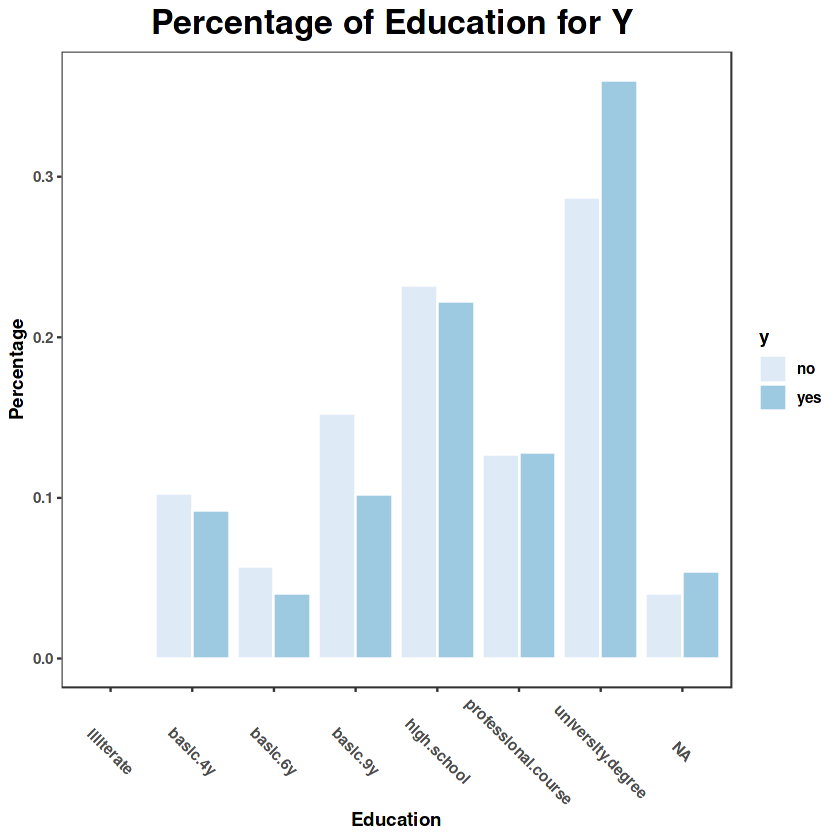

In [48]:
data$education <- factor(data$education,levels = c("illiterate","basic.4y",
  "basic.6y","basic.9y","high.school","professional.course","university.degree"))
plot_edu <-
  data %>%
  group_by(y, education) %>%
  summarise(cnt = n()) %>%
  mutate(pect = cnt / sum(cnt)) %>%
  ggplot(aes(x = education, y = pect, fill = y)) +
                     geom_bar(color="white", position = "dodge",stat = "identity") +
                     labs(x = "Education", y = 'Percentage', 
                          title = 'Percentage of Education for Y ') +
                     scale_fill_brewer(palette = "Blues") +
                     theme_bw()+
                     theme(text = element_text(face = "bold"),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     plot.title = element_text(size = 20, hjust = 0.5),   
                     axis.ticks = element_line(), 
                     axis.text.x = element_text(angle = -45, vjust = 0.5),
                     legend.position="right")
plot_edu

In [51]:
data <- data %>%
  mutate(education = case_when(
    education %in% c("basic.4y", "basic.6y") ~ "primary.school",
    education %in% c("basic.9y", "high.school") ~ "secondary.school",
    TRUE ~ as.character(education)
  ))


`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


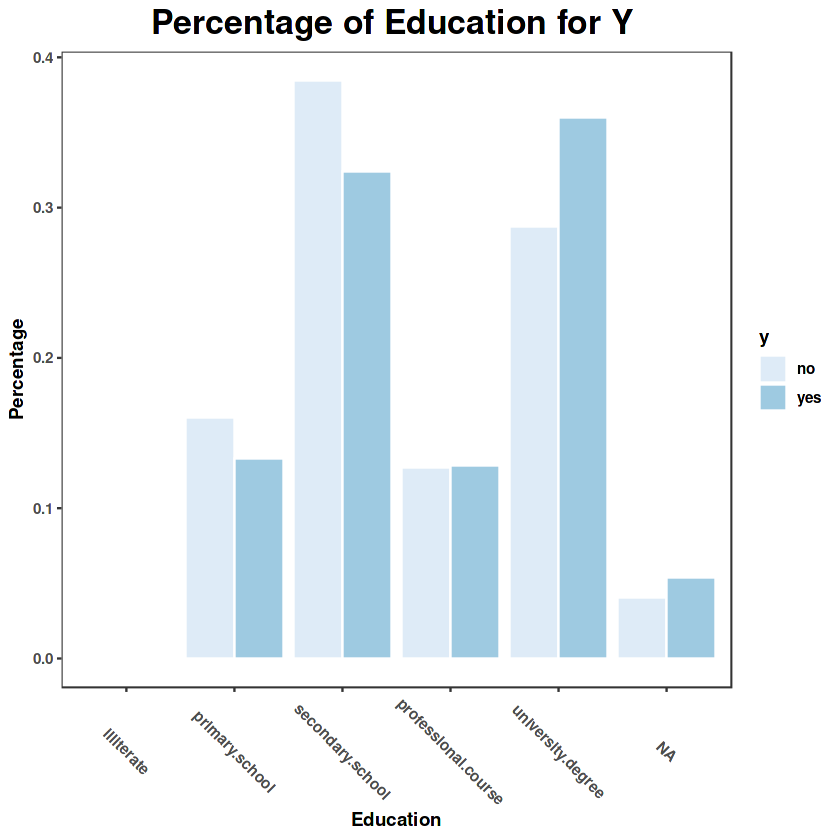

In [50]:
data$education <- factor(data$education,levels = c("illiterate","primary.school",
                "secondary.school","professional.course","university.degree"))
plot_edu <-
  data %>%
  group_by(y, education) %>%
  summarise(cnt = n()) %>%
  mutate(pect = cnt / sum(cnt)) %>%
  ggplot(aes(x = education, y = pect, fill = y)) +
                     geom_bar(color="white", position = "dodge",stat = "identity") +
                     labs(x = "Education", y = 'Percentage', 
                          title = 'Percentage of Education for Y ') +
                     scale_fill_brewer(palette = "Blues") +
                     theme_bw()+
                     theme(text = element_text(face = "bold"),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     plot.title = element_text(size = 20, hjust = 0.5),   
                     axis.ticks = element_line(), 
                     axis.text.x = element_text(angle = -45, vjust = 0.5),
                     legend.position="right")
plot_edu

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


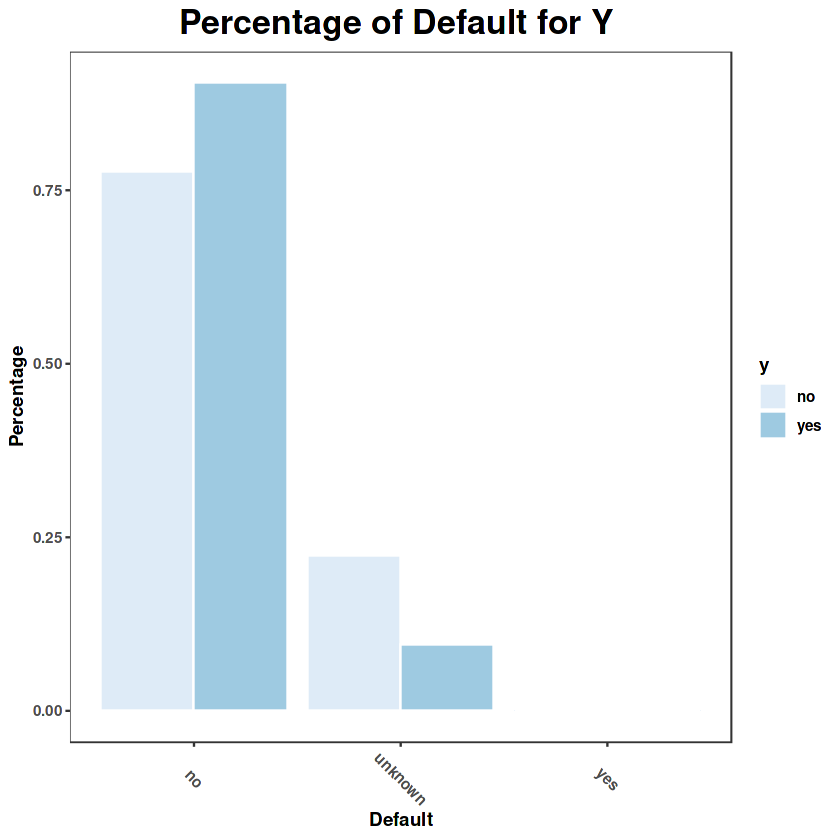

In [52]:
plot_default <- 
  data %>%
  group_by(y, default) %>%
  summarise(cnt = n()) %>%
  mutate(pect = cnt / sum(cnt)) %>%
  ggplot(aes(x = default, y = pect, fill = y)) +
                geom_bar(color="white", position = "dodge",stat = "identity") +
                labs(x = "Default", y = 'Percentage', 
                    title = 'Percentage of Default for Y ') +
                scale_fill_brewer(palette = "Blues") +
                theme_bw() + 
                theme(text = element_text(face = "bold"),
                panel.grid.major = element_blank(), 
                panel.grid.minor = element_blank(),
                plot.title = element_text(size = 20, hjust = 0.5),   
                axis.ticks = element_line(), 
                axis.text.x = element_text(angle = -45, vjust = 0.5),
                legend.position="right")
plot_default

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


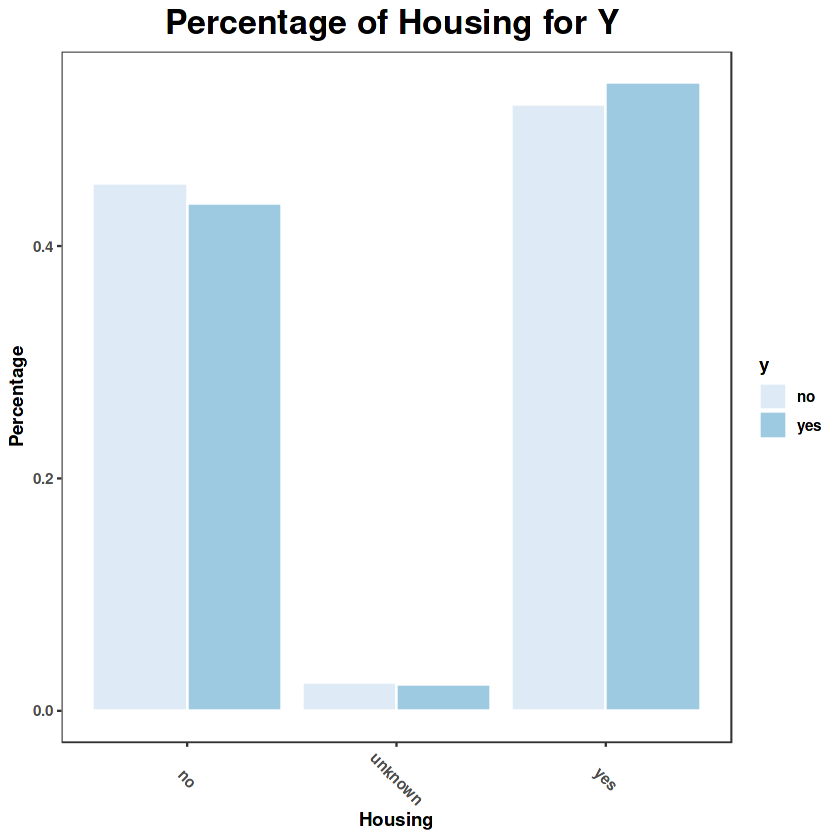

In [53]:
plot_housing <- 
  data %>%
  group_by(y, housing) %>%
  summarise(cnt = n()) %>%
  mutate(pect = cnt / sum(cnt)) %>%
  ggplot(aes(x = housing, y = pect, fill = y)) +
                     geom_bar(color="white", position = "dodge",stat = "identity") +
                     labs(x = "Housing", y = 'Percentage', 
                          title = 'Percentage of Housing for Y ') +
                     scale_fill_brewer(palette = "Blues") +
                     theme_bw() + 
                     theme(text = element_text(face = "bold"),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     plot.title = element_text(size = 20, hjust = 0.5),   
                     axis.ticks = element_line(), 
                     axis.text.x = element_text(angle = -45, vjust = 0.5),
                     legend.position="right")
plot_housing

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


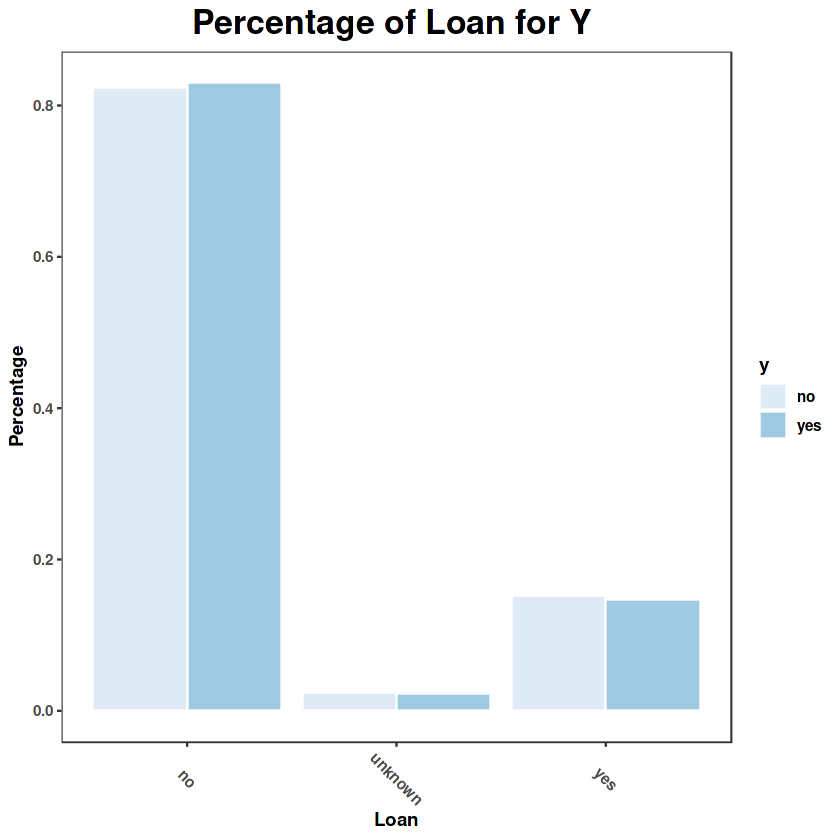

In [54]:
plot_loan <- 
  data %>%
  group_by(y, loan) %>%
  summarise(cnt = n()) %>%
  mutate(pect = cnt / sum(cnt)) %>%
  ggplot(aes(x = loan, y = pect, fill = y)) +
                     geom_bar(color="white", position = "dodge",stat = "identity") +
                     labs(x = "Loan", y = 'Percentage', 
                          title = 'Percentage of Loan for Y ') +
                     scale_fill_brewer(palette = "Blues") +
                     theme_bw() + 
                     theme(text = element_text(face = "bold"),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     plot.title = element_text(size = 20, hjust = 0.5),   
                     axis.ticks = element_line(), 
                     axis.text.x = element_text(angle = -45, vjust = 0.5),
                     legend.position="right")
plot_loan

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


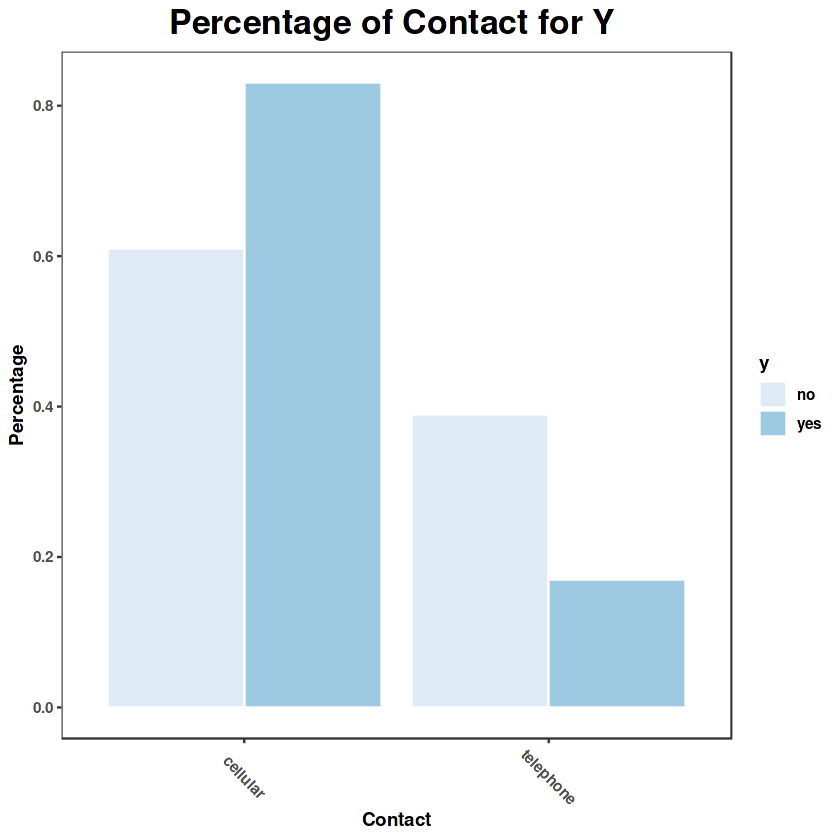

In [55]:
plot_contact <- 
  data %>%
  group_by(y, contact) %>%
  summarise(cnt = n()) %>%
  mutate(pect = cnt / sum(cnt)) %>%
  ggplot(aes(x = contact, y = pect, fill = y)) +
                     geom_bar(color="white", position = "dodge",stat = "identity") +
                     labs(x = "Contact", y = 'Percentage', 
                          title = 'Percentage of Contact for Y ') +
                     scale_fill_brewer(palette = "Blues") +
                     theme_bw() + 
                     theme(text = element_text(face = "bold"),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     plot.title = element_text(size = 20, hjust = 0.5),   
                     axis.ticks = element_line(), 
                     axis.text.x = element_text(angle = -45, vjust = 0.5),
                     legend.position="right")
plot_contact

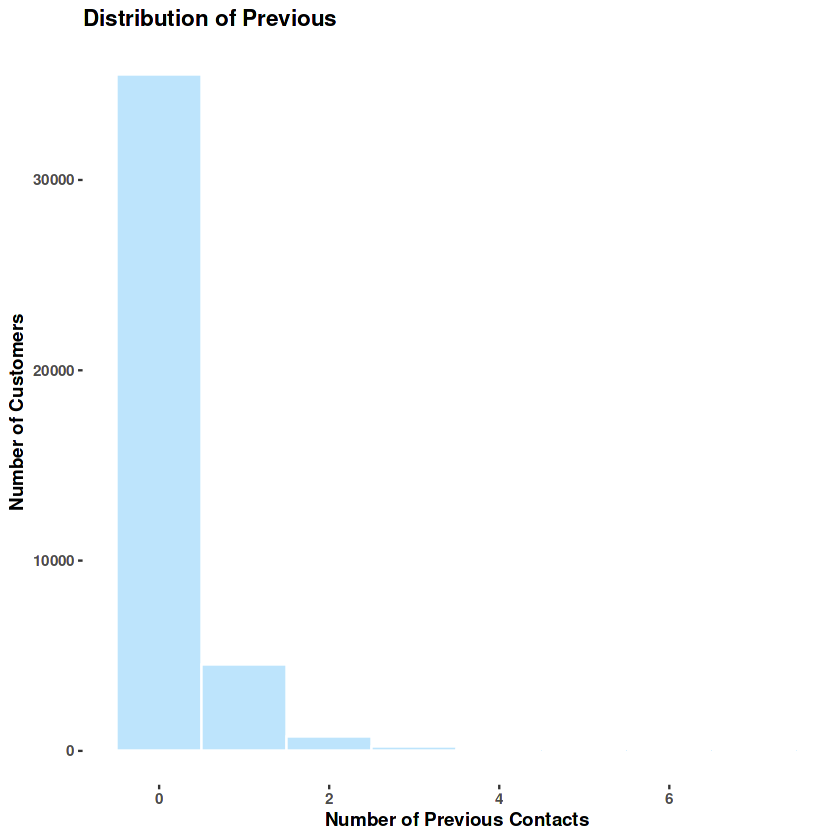

In [56]:
plot_pre <- ggplot(data, aes(x = previous, fill = previous, alpha = 0.8)) +
                     geom_histogram(binwidth = 1,color="white", fill="lightskyblue") +
                     labs(x = "Number of Previous Contacts",y = 'Number of Customers', 
                          title = 'Distribution of Previous') +
                     theme_bw()+
                     theme(text = element_text(face = "bold"), panel.border = element_blank(),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     axis.ticks = element_line(), legend.position="none")
plot_pre

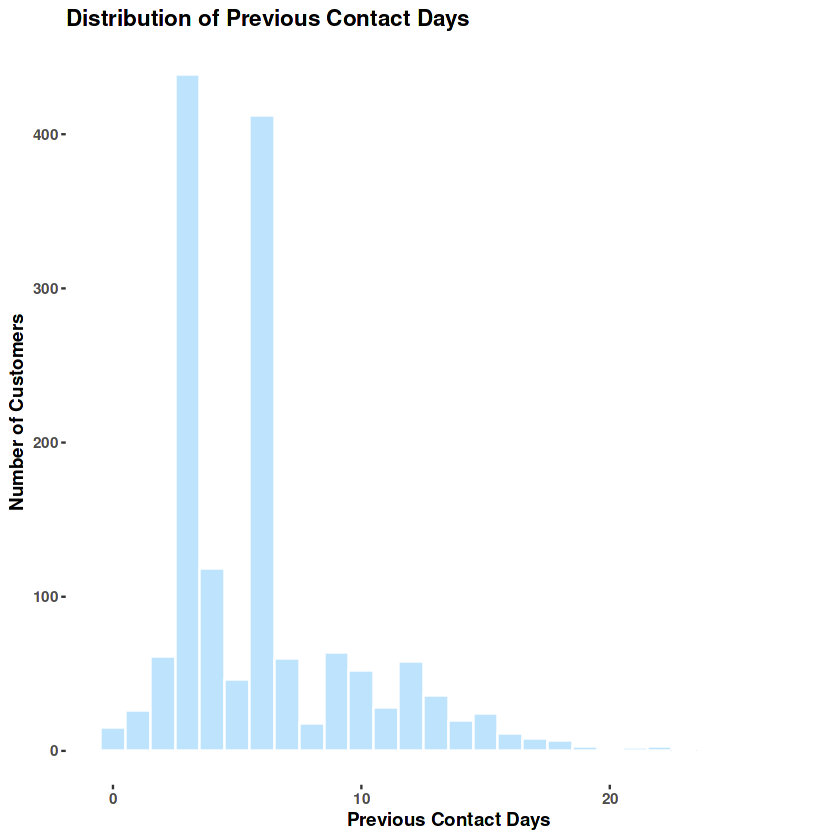

In [57]:
pd_n999 = filter(data, as.integer(pdays) != 999)
plot_pd <- ggplot(pd_n999, aes(x = pdays, fill = pdays, alpha = 0.8)) +
                     geom_histogram(binwidth = 1,color="white", fill="lightskyblue") +
                     labs(x = "Previous Contact Days",y = 'Number of Customers', 
                          title = 'Distribution of Previous Contact Days') +
                     theme_bw()+
                     theme(text = element_text(face = "bold"), panel.border = element_blank(),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     axis.ticks = element_line(), legend.position="none")
plot_pd

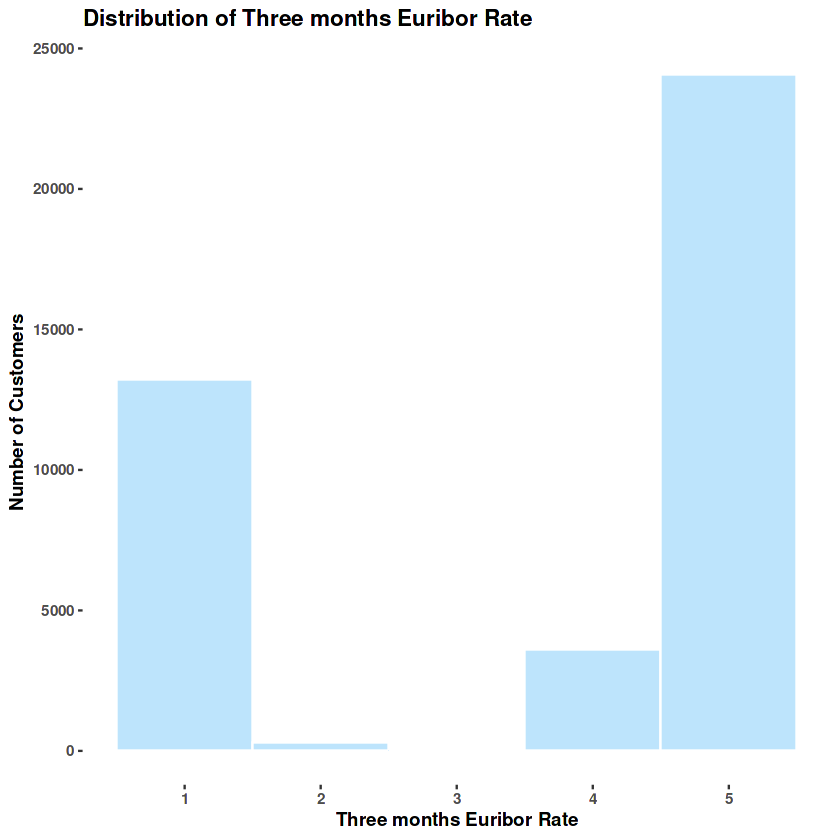

In [58]:
plot_int <- ggplot(data, aes(x = euribor3m, fill = euribor3m, alpha = 0.8)) +
                     geom_histogram(binwidth = 1,color="white", fill="lightskyblue") +
                     labs(x = "Three months Euribor Rate",y = 'Number of Customers', 
                          title = 'Distribution of Three months Euribor Rate') +
                     theme_bw()+
                     theme(text = element_text(face = "bold"), panel.border = element_blank(),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     axis.ticks = element_line(), legend.position="none")
plot_int

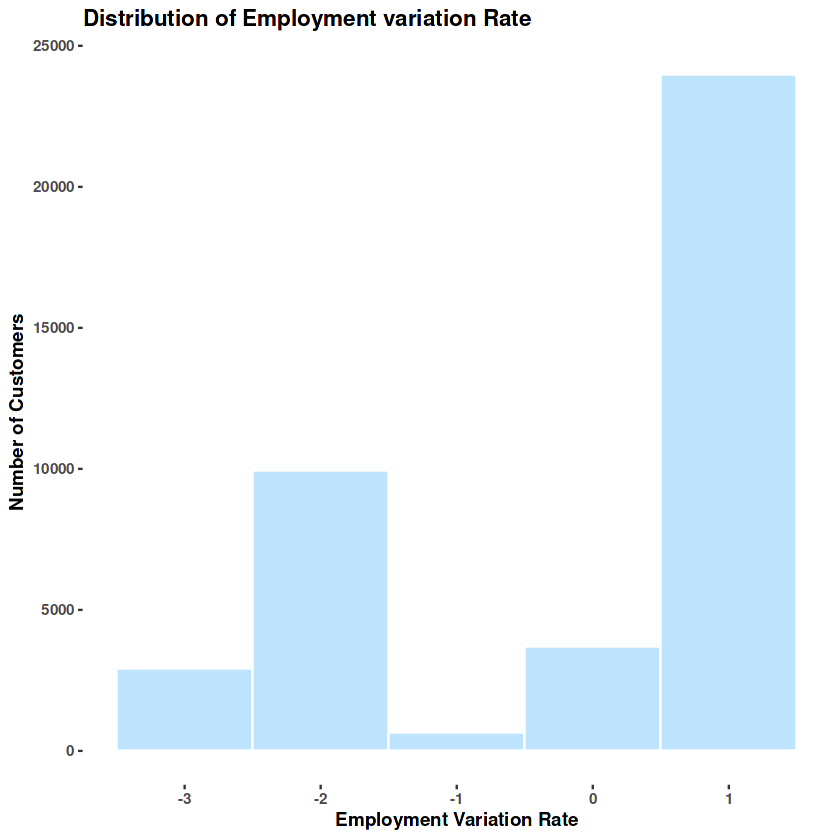

In [59]:
plot_empvr <- ggplot(data, aes(x = emp.var.rate, fill = emp.var.rate, alpha = 0.8)) +
                     geom_histogram(binwidth = 1,color="white", fill="lightskyblue") +
                     labs(x = "Employment Variation Rate",y = 'Number of Customers', 
                          title = 'Distribution of Employment variation Rate') +
                     theme_bw()+
                     theme(text = element_text(face = "bold"), panel.border = element_blank(),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     axis.ticks = element_line(), legend.position="none")
plot_empvr

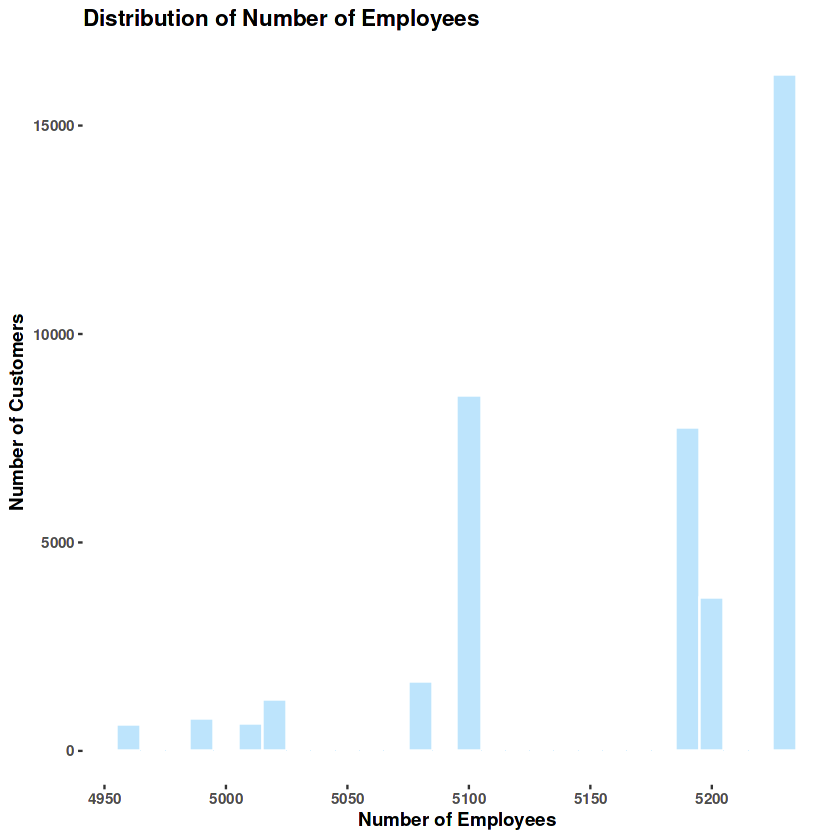

In [60]:
plot_emp <- ggplot(data, aes(x = nr.employed, fill = nr.employed, alpha = 0.8)) +
                     geom_histogram(binwidth = 10,color="white", fill="lightskyblue") +
                     labs(x = "Number of Employees",y = 'Number of Customers', 
                          title = 'Distribution of Number of Employees') +
                     theme_bw()+
                     theme(text = element_text(face = "bold"), panel.border = element_blank(),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     axis.ticks = element_line(), legend.position="none")
plot_emp

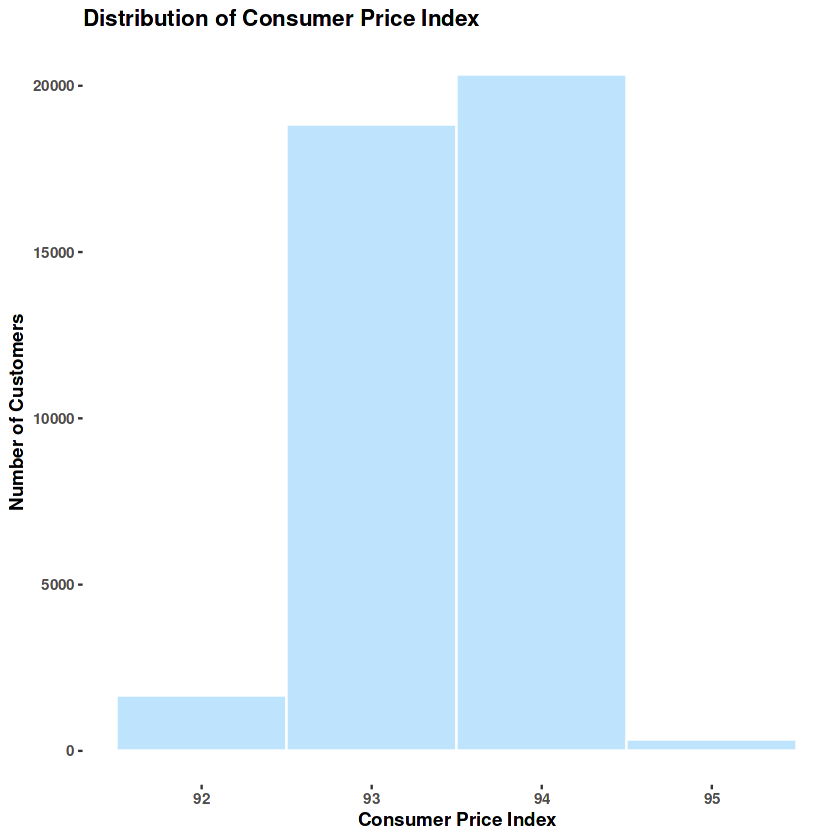

In [61]:
plot_cpi <- ggplot(data, aes(x = cons.price.idx, fill = cons.price.idx, alpha = 0.8)) +
                     geom_histogram(binwidth = 1,color="white", fill="lightskyblue") +
                     labs(x = "Consumer Price Index",y = 'Number of Customers', 
                          title = 'Distribution of Consumer Price Index') +
                     theme_bw()+
                     theme(text = element_text(face = "bold"), panel.border = element_blank(),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     axis.ticks = element_line(), legend.position="none")
plot_cpi

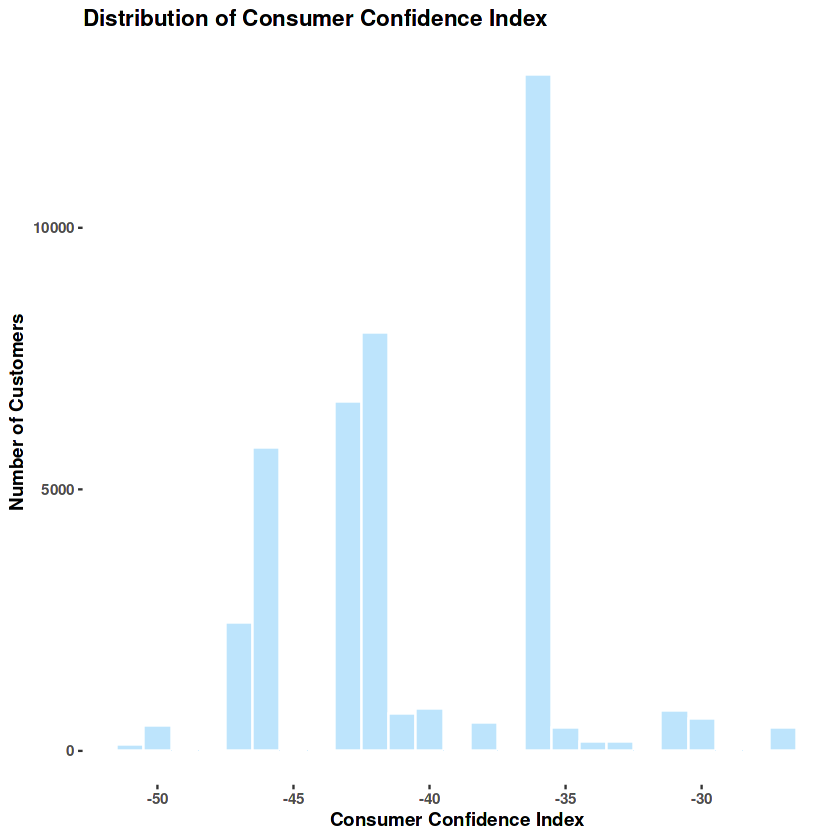

In [62]:
plot_cci <- ggplot(data, aes(x = cons.conf.idx, fill = cons.conf.idx, alpha = 0.8)) +
                     geom_histogram(binwidth = 1,color="white", fill="lightskyblue") +
                     labs(x = "Consumer Confidence Index",y = 'Number of Customers', 
                          title = 'Distribution of Consumer Confidence Index') +
                     theme_bw()+
                     theme(text = element_text(face = "bold"), panel.border = element_blank(),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     axis.ticks = element_line(), legend.position="none")
plot_cci

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


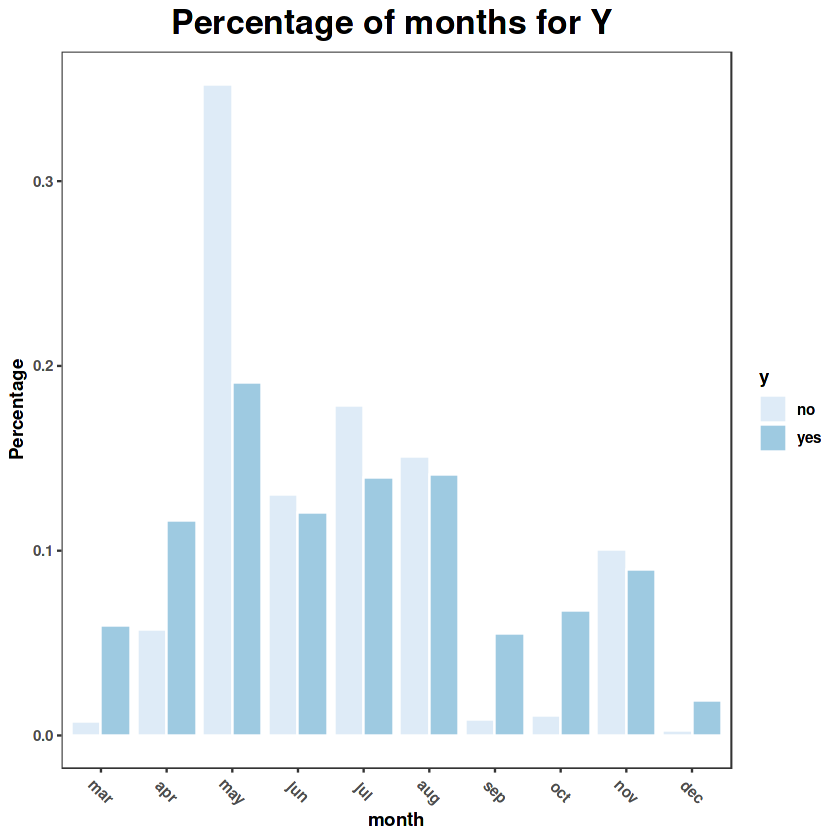

In [63]:
data$month <- factor(data$month,levels = c("jan","feb","mar","apr","may",
                                    "jun","jul","aug","sep","oct","nov","dec"))
plot_month <- 
  data %>%
  group_by(y, month) %>%
  summarise(cnt = n()) %>%
  mutate(pect = cnt / sum(cnt)) %>%
  ggplot(aes(x = month, y = pect, fill = y)) +
                     geom_bar(color="white", position = "dodge",stat = "identity") +
                     labs(x = "month", y = 'Percentage', 
                          title = 'Percentage of months for Y ') +
                     scale_fill_brewer(palette = "Blues") +
                     theme_bw() + 
                     theme(text = element_text(face = "bold"),
                     panel.grid.major = element_blank(), 
                     panel.grid.minor = element_blank(),
                     plot.title = element_text(size = 20, hjust = 0.5),   
                     axis.ticks = element_line(), 
                     axis.text.x = element_text(angle = -45, vjust = 0.5),
                     legend.position="right")
plot_month

# Preprocessing

In [64]:
data <- data[which(data$job != "unknown" & data$marital != "unknown" &
                data$education != "unknown" & data$default != "unknown" &
                data$housing != "unknown" & data$loan != "unknown"),
           -c(16,17,18,20)]

In [65]:
dim(data)

[1] 30488    17

In [66]:
data$day_of_week <- factor(data$day_of_week, levels = c("mon", "tue","wed", "thu", "fri"))
data$job <- factor(data$job) 
data$education <- factor(data$education)
data$marital <- factor(data$marital)
data$default <- if_else(data$default == "yes", 1,0)
data$housing <- if_else(data$housing == "yes", 1,0)
data$loan <- if_else(data$loan == "yes", 1,0)

In [ ]:
set.seed(123)
split <- rsample::initial_split(data, prop = 0.7,strata = "y")
train_data <- rsample::training(split)
test_data <- rsample:: testing(split)

In [67]:
pacman::p_load(recipes)

In [68]:
blueprint <-
  recipe(y ~ ., data = train_data) %>%
  step_nzv(all_predictors()) %>%
  step_center(duration, campaign,previous,euribor3m)  %>%
  step_scale(duration, campaign,previous,euribor3m) %>%
  step_integer(education, month, day_of_week) %>%
  step_dummy(job, marital, poutcome,contact)

prepare <- prep(blueprint, training = train_data)
baked_train_data <- bake(prepare, new_data = train_data)
baked_test_data <- bake(prepare, new_data = test_data)

In [69]:
set.seed(123)
n.k <- 10
cv.baked_train_yes <- cbind(baked_train_data[which(baked_train_data$y == "yes"),]
                      , fold = sample(1:n.k,length(which(baked_train_data$y == "yes")),
                      replace = TRUE))
cv.baked_train_no <- cbind(baked_train_data[which(baked_train_data$y == "no"),]
                      , fold = sample(1:n.k,length(which(baked_train_data$y == "no")),
                      replace = TRUE))

# Modeling

In [70]:
pacman::p_load(xgboost, gbm, h2o)

## Basic GBM

In [71]:
gbm_baked_train <- baked_train_data
gbm_baked_test <- baked_test_data
gbm_baked_train$y <- as.numeric(gbm_baked_train$y) - 1
gbm_baked_test$y <- as.numeric(gbm_baked_test$y) - 1

In [72]:
# determine optimal #trees
set.seed(123)
default_gbm = gbm(y ~ ., data = gbm_baked_train, shrinkage = 0.1, 
                  distribution = 'bernoulli', cv.folds = 5, n.trees = 1000, 
                  interaction.depth = 3, n.minobsinnode = 10, verbose = FALSE,
                  class.stratify.cv = TRUE)

predicts <- predict(default_gbm, gbm_baked_train)
mean(as.numeric(predicts > 0.5) == gbm_baked_train$y)

Using 903 trees...




[1] 0.9192634

[1] 903

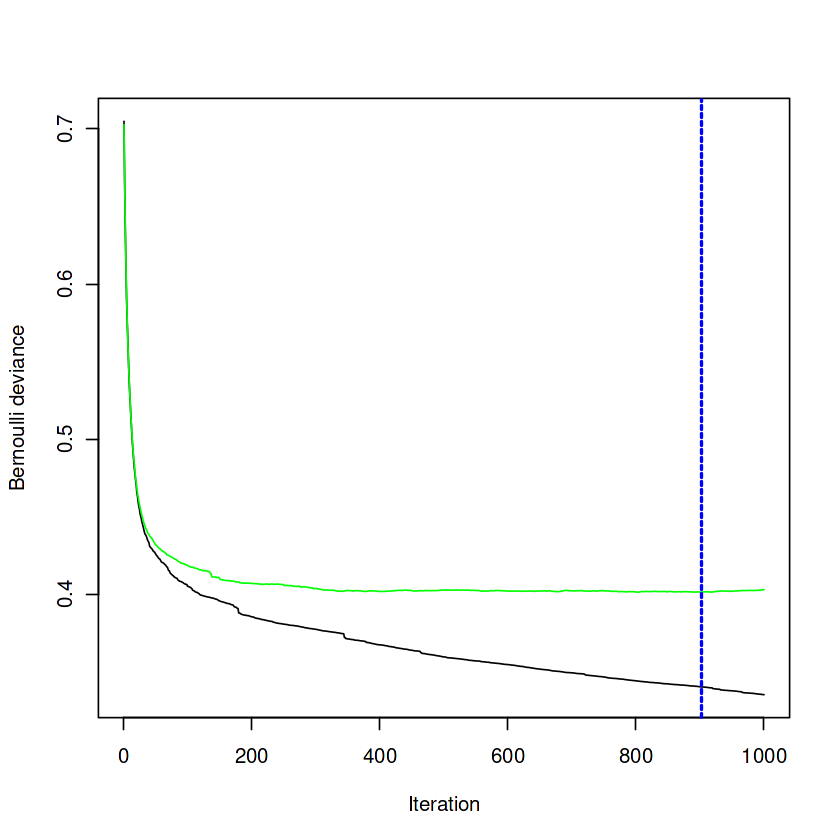

In [73]:
gbm.perf(default_gbm, method = "cv")

In [74]:
hyper_grid_gbm <- expand.grid(learning_rate = c(0.3, 0.1, 0.05, 0.03, 0.01),
                              accuracy = NA, trees = NA, time = NA)

set.seed(123)
for (i in c(1 : nrow(hyper_grid_gbm))) {
  train_time <- system.time(
  gbm_fit <- gbm(y ~ ., data = gbm_baked_train, shrinkage = hyper_grid_gbm$learning_rate[i], 
                 distribution = 'bernoulli', n.trees = 1000, interaction.depth = 3,
                 n.minobsinnode = 10, verbose = FALSE, cv.folds = 5,
                 class.stratify.cv = TRUE)
  )
  predicts <- predict(gbm_fit, gbm_baked_train)
  hyper_grid_gbm[i, "accuracy"] <- mean(as.numeric(predicts > 0.5) == gbm_baked_train$y)
  hyper_grid_gbm[i, "trees"] <- which.min(gbm_fit$cv.error)
  hyper_grid_gbm[i, "time"] <- train_time[["elapsed"]]
}

hyper_grid_gbm <- arrange(hyper_grid_gbm, desc(accuracy))
hyper_grid_gbm

Using 182 trees...


Using 888 trees...


Using 958 trees...


Using 1000 trees...


Using 1000 trees...




learning_rate,accuracy,trees,time
<dbl>,<dbl>,<int>,<dbl>
0.10,0.9191228,888,73.597
0.30,0.9139216,182,73.575
0.05,0.9131718,958,74.989
0.03,0.9094700,1000,74.001
0.01,0.9015041,1000,75.720


In [75]:
gbm_hyper_grid <- expand.grid(shrinkage = 0.1, depth = c(3,5,7),
                              min.node.size = c(5,10,15), accuracy = NA, 
                              trees = NA, time = NA)

In [76]:
set.seed(123)

for (i in seq_len(nrow(gbm_hyper_grid))){
  start_time <- Sys.time()
  gbm_fit <- gbm(y ~ ., data = gbm_baked_train, shrinkage = 0.1, 
                distribution = 'bernoulli', n.trees = 1000,
                interaction.depth = gbm_hyper_grid$depth[i],
                n.minobsinnode = gbm_hyper_grid$min.node.size[i],
                verbose = FALSE, cv.folds = 5, class.stratify.cv = TRUE)
  
  predicts <- predict(gbm_fit, gbm_baked_train)

  end_time <- Sys.time()
  time = end_time - start_time

  gbm_hyper_grid$accuracy[i] <- mean(as.numeric(predicts > 0.5) == gbm_baked_train$y)
  gbm_hyper_grid$time[i] <- time
  gbm_hyper_grid$trees[i] <- which.min(gbm_fit$cv.error)
} 

gbm_hyper_grid <- arrange(gbm_hyper_grid, desc(accuracy))
gbm_hyper_grid

Using 893 trees...


Using 360 trees...


Using 217 trees...


Using 706 trees...


Using 276 trees...


Using 148 trees...


Using 714 trees...


Using 372 trees...


Using 276 trees...




shrinkage,depth,min.node.size,accuracy,trees,time
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
0.1,3,5,0.9205754,893,1.231661
0.1,7,15,0.9202943,276,2.316825
0.1,5,5,0.9189822,360,1.752366
0.1,5,15,0.9187479,372,1.779992
0.1,7,5,0.9181857,217,2.291271
0.1,3,10,0.9163113,706,1.229487
0.1,3,15,0.9158896,714,1.222145
0.1,5,10,0.9156553,276,1.771583
0.1,7,10,0.9143433,148,2.280859


In [77]:
set.seed(123)
gbm_best <- gbm(y ~ ., data = gbm_baked_train, shrinkage = 0.1, 
                distribution = 'bernoulli', n.trees = 1000, 
                interaction.depth = 5, n.minobsinnode = 5, verbose = FALSE,
                cv.folds = 5, class.stratify.cv = TRUE)

In [79]:
train_predicts <- predict(gbm_best, newdata = gbm_baked_train)
test_predicts <- predict(gbm_best, newdata = gbm_baked_test)

gbm_train_accuracy <- mean(as.numeric(train_predicts > 0.5) == gbm_baked_train$y)
gbm_test_accuracy <- mean(as.numeric(test_predicts > 0.5) == gbm_baked_test$y)

Using 313 trees...


Using 313 trees...




## XGBoost

In [81]:
x_xgb = as.matrix(baked_train_data[, -c(11)])
y_xgb = if_else(baked_train_data$y == "yes", 1,0)

In [82]:
hyper_grid_xgb <- expand.grid(
  eta = 0.1, depth = 5, min_node_size = 5,
  subsample = 0.5, colsample_bytree = 0.5, 
  gamma = c(0, 0.01, 0.1, 0.5),
  lambda = c(0.01,0.1,1),
  alpha = c(0.01,0.1,1),
  accuracy = 0,
  trees = 0,
  time = 0
)

In [93]:
set.seed(123)
for (i in seq_len(nrow(hyper_grid_xgb))){
  start_time <- Sys.time()
  xgb_fit <- xgb.cv(data = x_xgb, label = y_xgb, nrounds = 1000, 
                  eval_metric = "error", early_stopping_rounds = 40, 
                  nfold = 5, 
                  params = list(eta = 0.1, max_depth = gbm_hyper_grid$depth[1], min_child_weight =    gbm_hyper_grid$min.node.size[1], 
                  subsample = 0.5, colsample_bytree = 0.5,
                  gamma = hyper_grid_xgb[i, "gamma"], 
                  lambda = hyper_grid_xgb[i, "lambda"],
                  alpha = hyper_grid_xgb[i, "alpha"]), verbose = FALSE)
  end_time = Sys.time()
  time <- end_time - start_time
  
  hyper_grid_xgb$accuracy[i] = 1 - mean(xgb_fit$evaluation_log$test_error_mean)
  hyper_grid_xgb$trees[i] = xgb_fit$best_iteration
  hyper_grid_xgb[i, "time"] <- time
}

hyper_grid_xgb <- arrange(hyper_grid_xgb, desc(accuracy))
hyper_grid_xgb[1:5, -c(1:5)]

,gamma,lambda,alpha,accuracy,trees,time
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0,0.10,0.01,0.9013169,225,8.356392
2,0.1,1.00,1.00,0.9012565,252,9.161727
3,0.0,0.10,1.00,0.9012478,226,8.443543
4,0.5,0.01,0.10,0.9012291,168,6.649860
5,0.1,0.01,1.00,0.9009434,220,8.334850


In [94]:
set.seed(123)
xgb_final <- xgboost(
    data = x_xgb,
    label = y_xgb,
    objective = "binary:logistic",
    eval_metric = "error",

    nrounds = 5000,
    early_stopping_rounds = 40,
    verbose = 0,
    params = list(
      eta = 0.1,
      max_depth = hyper_grid_xgb$depth[1],
      min_child_weight = hyper_grid_xgb$min_node_size[1],
      gamma = hyper_grid_xgb$gamma[1],
      lambda = hyper_grid_xgb$lambda[1],
      alpha = hyper_grid_xgb$alpha[1]
      )
)

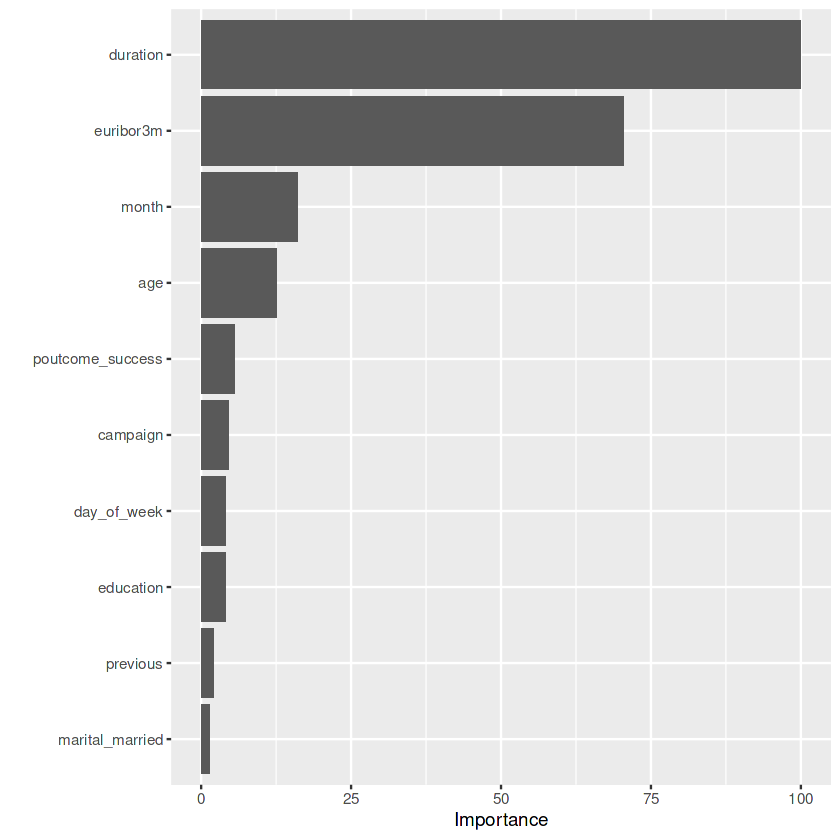

In [95]:
vip::vip(xgb_final,scale = TRUE)

In [96]:
test_predicts <- predict(xgb_final, newdata = as.matrix(baked_test_data[, -c(11)]))
train_predicts <- predict(xgb_final, newdata = as.matrix(baked_train_data[, -c(11)]))

xgb_train_accuracy <- mean(as.numeric(train_predicts > 0.5) ==
                            if_else(baked_train_data$y == "yes", 1, 0))
xgb_test_accuracy <- mean(as.numeric(test_predicts > 0.5) == 
                            if_else(baked_test_data$y == "yes", 1, 0))

In [97]:
comparison <- data.frame(Basic.GBM = c(gbm_train_accuracy,
             gbm_test_accuracy), XGBoost = c(xgb_train_accuracy, xgb_test_accuracy),
           row.names = c("CV Accuracy", "Test Accuracy"))

In [98]:
comparison

,Basic.GBM,XGBoost
,<dbl>,<dbl>
CV Accuracy,0.9173891,0.9720725
Test Accuracy,0.9017164,0.9018257
